# Tutorial: TC risk and adaptation options in the Caribbean 

In [1]:
# Country List
#countryl = ["AIA","ATG","BHS","DMA","DOM","HTI","KNA","MSR","PRI","TCA","VGB" ] 
# source litpop: nfw AIA ATG BHS DMA KNA MSR PRI TCA VGB pc (produced capital) DOM HTI

## Exposure 

In [2]:
%matplotlib inline
import numpy as np
from climada.entity.exposures import LitPop

In [3]:
import os
from climada.util import save, load

### Uncomment this to read the saved data:
abs_path = os.path.join(os.getcwd(), 'results/exp_hti.h5')
exp = load(abs_path)

In [4]:
#exp.plot_raster() 
#exp.plot_scatter()

# Hazard

In [5]:
### Uncomment this to read the saved data:
abs_path = os.path.join(os.getcwd(), 'results/tc_hti.h5')
tc = load(abs_path)

In [6]:
#tc.plot_rp_intensity()

# Impact 

In [7]:
### Uncomment this to read the saved data:
#abs_path = os.path.join(os.getcwd(), 'results/imp_atg.csv')
#imp = load(abs_path)

In [8]:
#imp.plot_hexbin_eai_exposure(buffer=1)

In [9]:
from climada.entity.impact_funcs.trop_cyclone import ImpfSetTropCyclone
from climada.entity import ImpactFuncSet
import matplotlib.pyplot as plt

# generate the default calibrated TC impact functions for different regions
imp_fun = ImpfSetTropCyclone()
imp_fun.set_calibrated_regional_ImpfSet()

{'NA1': 66.3,
 'NA2': 89.2,
 'NI': 70.8,
 'OC': 64.1,
 'SI': 52.4,
 'WP1': 66.4,
 'WP2': 188.4,
 'WP3': 112.8,
 'WP4': 190.5,
 'ROW': 110.1}

# Damages 2100 at 3°C

In [10]:
import copy
tc_fut = copy.deepcopy(tc)
tc_fut.intensity.data += 1.9 

In [11]:
# present exposure - 2020 and future exposure - 2100
exp_20 = copy.deepcopy(exp)
exp_20.ref_year = 2020
exp_20.gdf.value = exp_20.gdf.value*1.02**(2020-2014) # Litpop 2014 values * 2% annual growth rate

exp_10 = copy.deepcopy(exp)
exp_10.ref_year = 2100
exp_10.gdf.value = exp_10.gdf.value*1.02**(2100-2014) # Litpop 2014 values * 2% annual growth rate

In [12]:
%matplotlib inline
from climada.entity import Entity
from climada.entity.exposures import LitPop

ent_20 = Entity()
ent_20.exposures = exp_20
ent_10 = Entity()
ent_10.exposures = exp_10

2021-10-31 07:56:44,708 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-31 07:56:44,709 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-31 07:56:44,711 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-31 07:56:44,711 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-31 07:56:44,712 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326
2021-10-31 07:56:44,728 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-31 07:56:44,729 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-31 07:56:44,729 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-31 07:56:44,730 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-31 07:56:44,731 - climada.entity.exposures.base - INFO - crs set to default

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:219: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']


In [13]:
from climada.entity.impact_funcs.trop_cyclone import ImpfSetTropCyclone
from climada.entity import ImpactFuncSet
import matplotlib.pyplot as plt

# generate the default calibrated TC impact functions for different regions
imp_fun = ImpfSetTropCyclone()
imp_fun.set_calibrated_regional_ImpfSet()

ent_20.impact_funcs = imp_fun
ent_10.impact_funcs = imp_fun

In [14]:
from climada.entity import Measure, MeasureSet

meas_0 = Measure()
meas_0.name = 'Current Adaptation'
meas_0.haz_type = 'TC'
meas_0.cost = 1

meas_set = MeasureSet()
meas_set.append(meas_0)
meas_set.check()

ent_20.measures = meas_set
ent_10.measures = meas_set

2021-10-31 07:56:45,704 - climada.util.checker - ERROR - Invalid Measure.color_rgb size: 3 != 4.


In [15]:
ent_20.exposures.ref_year = 2020
ent_10.exposures.ref_year = 2100

In [16]:
# define discount rates
import numpy as np
from climada.entity import DiscRates

disc_rate = DiscRates()
disc_rate.years = np.arange(2000, 2101)
disc_rate.rates = np.zeros(disc_rate.years.size) # 0%

ent_20.disc_rates = disc_rate
ent_10.disc_rates = disc_rate

2021-10-31 07:56:47,100 - climada.entity.exposures.base - INFO - Matching 33198 exposures with 33198 centroids.
2021-10-31 07:56:47,115 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:47,116 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-31 07:56:47,282 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-31 07:56:47,285 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:47,286 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-31 07:56:47,427 - climada.entity.exposures.base - INFO - Matching 33198 exposures with 33198 centroids.
2021-10-31 07:56:47,433 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:47,433 - climada.engine.impa

<AxesSubplot:title={'center':'Risk at 2020 and 2100'}, ylabel='Impact (USD m)'>

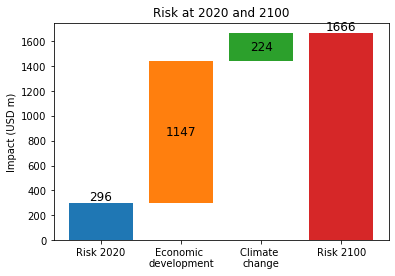

In [17]:
from climada.engine import CostBenefit,risk_aai_agg

cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_10) # prints costs and benefits
cost_ben.plot_waterfall(tc, ent_20, tc_fut, ent_10, risk_func=risk_aai_agg)

# Damages in 2100 at 1.5°C

In [18]:
import copy
tc_fut = copy.deepcopy(tc)
tc_fut.intensity.data += 0.4

2021-10-31 07:56:48,303 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-31 07:56:48,305 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:48,306 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-31 07:56:48,428 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-31 07:56:48,431 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:48,431 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-31 07:56:48,548 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-31 07:56:48,550 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:48,551 - climada.engine.impact - INFO - Miss

<AxesSubplot:title={'center':'Risk at 2020 and 2100'}, ylabel='Impact (USD m)'>

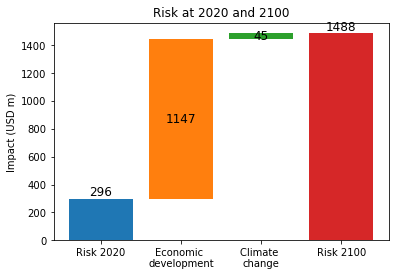

In [19]:
from climada.engine import CostBenefit,risk_aai_agg

cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_10) # prints costs and benefits
cost_ben.plot_waterfall(tc, ent_20, tc_fut, ent_10, risk_func=risk_aai_agg)

# Damages 2030 (1.4°C)

In [20]:
import copy
tc_fut = copy.deepcopy(tc)
tc_fut.intensity.data += 0.3

In [21]:
# present exposure - 2020 and future exposure - 2030
exp_20 = copy.deepcopy(exp)
exp_20.ref_year = 2020
exp_20.gdf.value = exp_20.gdf.value*1.02**(2020-2014) # Litpop 2014 values * 2% annual growth rate

exp_10 = copy.deepcopy(exp)
exp_10.ref_year = 2030
exp_10.gdf.value = exp_10.gdf.value*1.02**(2030-2014) # Litpop 2014 values * 2% annual growth rate

In [22]:
%matplotlib inline
from climada.entity import Entity
from climada.entity.exposures import LitPop

ent_20 = Entity()
ent_20.exposures = exp_20
ent_10 = Entity()
ent_10.exposures = exp_10

2021-10-31 07:56:49,453 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-31 07:56:49,454 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-31 07:56:49,455 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-31 07:56:49,455 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-31 07:56:49,456 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326
2021-10-31 07:56:49,468 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-10-31 07:56:49,469 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-10-31 07:56:49,470 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-10-31 07:56:49,470 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-10-31 07:56:49,472 - climada.entity.exposures.base - INFO - crs set to default

/Users/tmb/Documents/CLIMADA/climada_python-2.1.1/climada/entity/exposures/base.py:219: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']


In [23]:
ent_20.impact_funcs = imp_fun
ent_10.impact_funcs = imp_fun

In [24]:
ent_20.measures = meas_set
ent_10.measures = meas_set

In [25]:
ent_20.exposures.ref_year = 2020
ent_10.exposures.ref_year = 2030

In [26]:
# define discount rates
import numpy as np
from climada.entity import DiscRates

disc_rate = DiscRates()
disc_rate.years = np.arange(2000, 2101)
disc_rate.rates = np.zeros(disc_rate.years.size) # 0%

ent_20.disc_rates = disc_rate
ent_10.disc_rates = disc_rate

2021-10-31 07:56:50,527 - climada.entity.exposures.base - INFO - Matching 33198 exposures with 33198 centroids.
2021-10-31 07:56:50,532 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:50,533 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-31 07:56:50,679 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-31 07:56:50,683 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:50,684 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.
2021-10-31 07:56:50,810 - climada.entity.exposures.base - INFO - Matching 33198 exposures with 33198 centroids.
2021-10-31 07:56:50,814 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:50,815 - climada.engine.impa

<AxesSubplot:title={'center':'Risk at 2020 and 2030'}, ylabel='Impact (USD m)'>

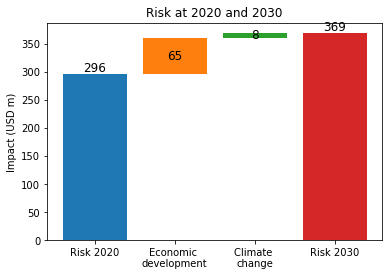

In [27]:
from climada.engine import CostBenefit,risk_aai_agg

cost_ben = CostBenefit()
cost_ben.calc(tc, ent_20, tc_fut, ent_10) # prints costs and benefits
cost_ben.plot_waterfall(tc, ent_20, tc_fut, ent_10, risk_func=risk_aai_agg)

In [28]:
from climada.engine import Impact
imp_20 = Impact()
imp_20.calc(exp_20, imp_fun, tc)

2021-10-31 07:56:51,537 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-31 07:56:51,539 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:51,539 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.


<AxesSubplot:title={'center':'Exceedance frequency curve'}, xlabel='Return period (year)', ylabel='Impact (USD)'>

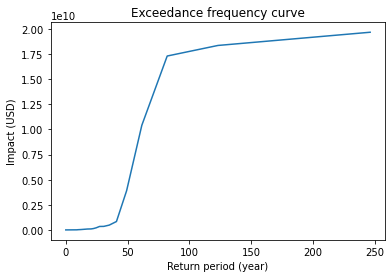

In [29]:
imp_20.calc_freq_curve().plot()

2021-10-31 07:56:52,625 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-10-31 07:56:52,629 - climada.engine.impact - INFO - Calculating damage for 33052 assets (>0) and 3906 events.
2021-10-31 07:56:52,630 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.


<AxesSubplot:title={'center':'Exceedance frequency curve'}, xlabel='Return period (year)', ylabel='Impact (USD)'>

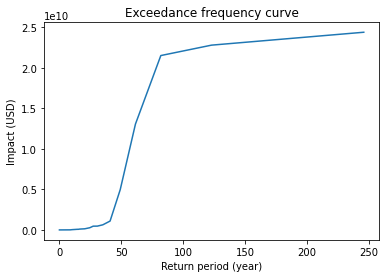

In [30]:
from climada.engine import Impact
imp_30 = Impact()
imp_30.calc(exp_10, imp_fun, tc_fut)
imp_30.calc_freq_curve().plot()